In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

In [81]:
df = pd.read_csv('posts.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,likes
0,2529,2025-08-07 02:21:34,19
1,2519,2025-08-05 20:16:26,29
2,2515,2025-08-05 15:32:36,48
3,2512,2025-08-04 22:28:35,50
4,2509,2025-08-03 21:05:35,37


In [207]:
df['hour'] = df['date'].dt.hour
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['date'].dt.day_name(), categories=weekday_order, ordered=True)
df['diff'] = ((df['date'] - df['date'].shift(-1)).dt.total_seconds()) / (60 * 60 * 24)

bins = [0, 1, 2, 6, 14, df['diff'].max()]
labels = ['<1 дня', '1-2 дня', '3-6 дней', '7-14 дней', '>14 дней']

df['diff'] = pd.cut(df['diff'], bins=bins, labels=labels)

df.head()

,id,date,likes,hour,weekday,diff
0,2529,2025-08-07 02:21:34,19,2,Thursday,1-2 дня
1,2519,2025-08-05 20:16:26,29,20,Tuesday,<1 дня
2,2515,2025-08-05 15:32:36,48,15,Tuesday,<1 дня
3,2512,2025-08-04 22:28:35,50,22,Monday,1-2 дня
4,2509,2025-08-03 21:05:35,37,21,Sunday,7-14 дней


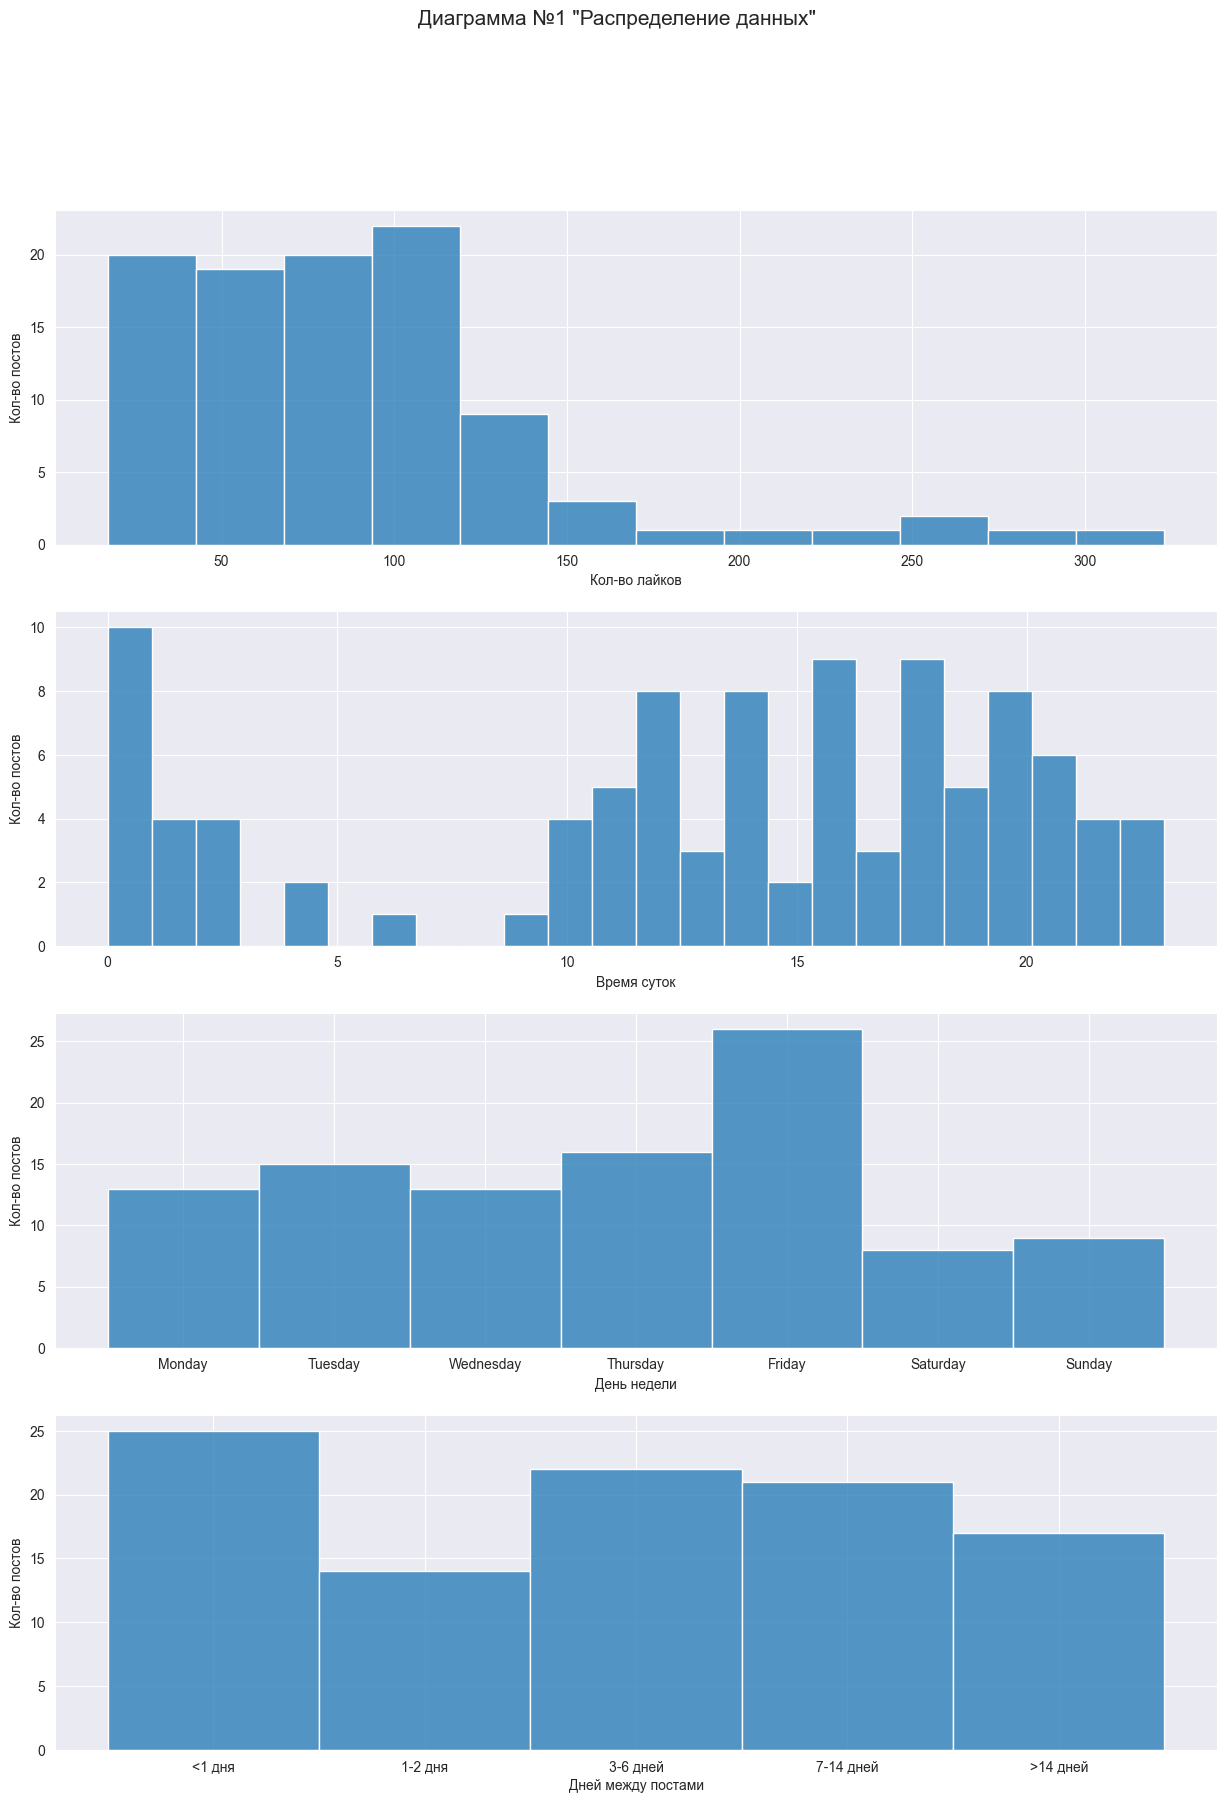

In [215]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

sns.histplot(
    data=df,
    x='likes',
    ax=ax[0]
)
ax[0].set_ylabel('Кол-во постов')
ax[0].set_xlabel('Кол-во лайков')

sns.histplot(
    data=df,
    x='hour',
    bins=24,
    ax=ax[1]
)
ax[1].set_ylabel('Кол-во постов')
ax[1].set_xlabel('Время суток')

sns.histplot(
    data=df,
    x='weekday',
    ax=ax[2]
)
ax[2].set_ylabel('Кол-во постов')
ax[2].set_xlabel('День недели')

sns.histplot(
    data=df,
    x='diff',
    ax=ax[3]
)
ax[3].set_ylabel('Кол-во постов')
ax[3].set_xlabel('Дней между постами')

fig.suptitle('Диаграмма №1 "Распределение данных"', fontsize=15)

plt.savefig('diagrams/Диаграмма№1')
plt.show()


C:\Users\dokin\AppData\Local\Temp\ipykernel_13848\3363977462.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df[['weekday', 'likes']].groupby('weekday', as_index=False).mean()
C:\Users\dokin\AppData\Local\Temp\ipykernel_13848\3363977462.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = df[['diff', 'likes']].groupby('diff', as_index=False).mean()


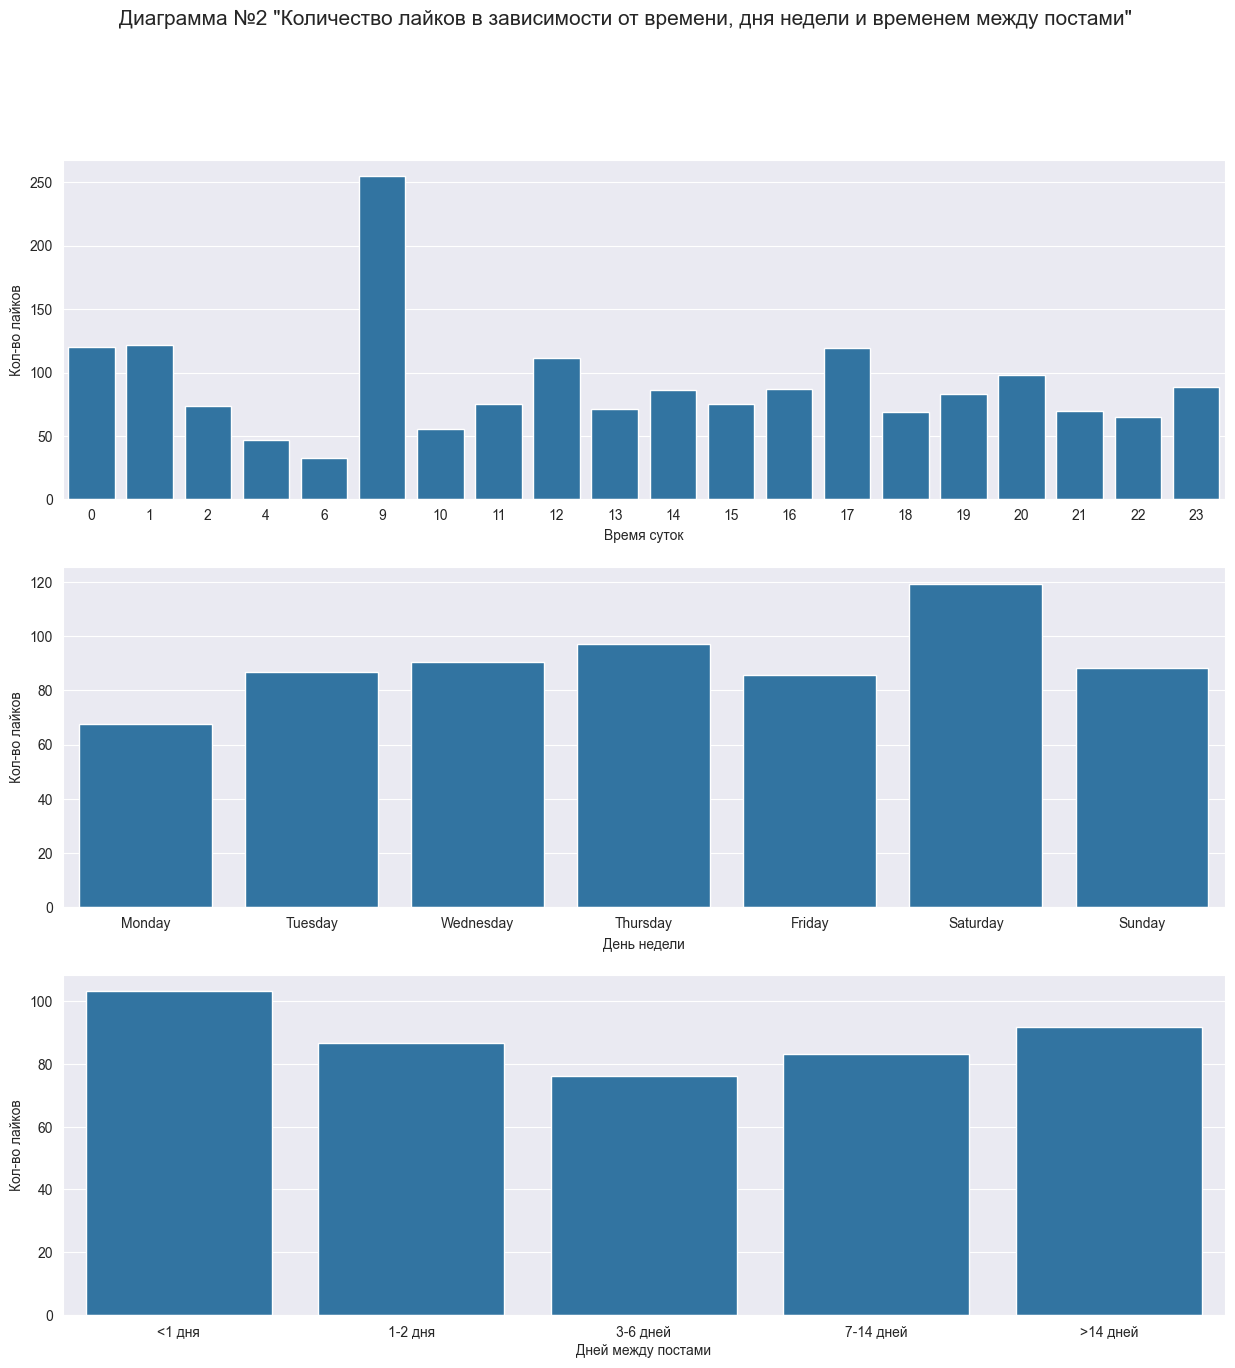

In [216]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

df1 = df[['hour', 'likes']].groupby('hour', as_index=False).mean()
df2 = df[['weekday', 'likes']].groupby('weekday', as_index=False).mean()
df3 = df[['diff', 'likes']].groupby('diff', as_index=False).mean()

sns.barplot(
    data=df1,
    x='hour',
    y='likes',
    ax=ax[0]
)
ax[0].set_ylabel('Кол-во лайков')
ax[0].set_xlabel('Время суток')

sns.barplot(
    data=df2,
    x='weekday',
    y='likes',
    ax=ax[1]
)
ax[1].set_ylabel('Кол-во лайков')
ax[1].set_xlabel('День недели')

sns.barplot(
    data=df3,
    x='diff',
    y='likes',
    ax=ax[2]
)
ax[2].set_ylabel('Кол-во лайков')
ax[2].set_xlabel('Дней между постами')

fig.suptitle('Диаграмма №2 "Количество лайков в зависимости от времени, дня недели и временем между постами"', fontsize=15)

plt.savefig('diagrams/Диаграмма№2')
plt.show()

# Выводы

Исходя из Диаграммы №2, можно сделать следующие выводы:

- Количество лайков слабо и не очевидно зависит от времени суток. Возможно, посты, выложенные в обед, после рабочего дня или после полуночи, получают несколько большее внимание, но данные гипотезы требуют дополнительного исследования. Ночные посты оценить трудно, поскольку их мало в общей выборке, что видно на Диаграмме №1.

- Посты, выложенные в субботу, получают больше лайков, а в понедельник - меньше.

- Посты получают больше лайков, если следуют подряд - с интервалом <1 дня или после длительного перерыва.